In [2]:
%matplotlib inline
from IPython.display import Image
import pandas as pd
from db_scripts.get_server_data import data_dir, get_table_for_variable, fig_dir, get_db_table_as_df
import numpy as np
from sklearn.decomposition import PCA
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from operator import add
import matplotlib
import pydotplus
from mpl_toolkits.mplot3d import Axes3D

Read in the data

In [2]:
df = get_db_table_as_df('for_model')
df.sort_values('flooded', inplace=True)
df['wind_dir_daily_avg'] = df['wind_dir_daily_avg']/360.
df

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_dir_daily_avg,wind_vel_daily_avg,wind_vel_hourly_max_avg,num_flooded,flooded,event_name,event_date
1235,1.320000,3.200000e-01,0.12,1.345000e+00,2.441582,0.064875,0.380328,4.722118,5.075417,0.0,0,None,2013-04-29 00:00:00
1642,0.003333,1.000000e-02,0.01,1.496667e+00,1.689739,0.559250,0.229711,6.531604,7.807500,0.0,0,None,2014-06-14 00:00:00
1643,0.000000,6.643991e-16,0.00,3.366667e-01,1.578101,0.288250,0.312248,4.901597,5.331250,0.0,0,None,2014-06-15 00:00:00
1644,0.000000,6.643991e-16,0.00,3.333333e-03,1.563858,0.140667,0.542563,4.962458,5.590833,0.0,0,None,2014-06-16 00:00:00
1645,0.000000,6.643991e-16,0.00,-1.209102e-15,1.583206,0.199542,0.623577,5.924451,6.553750,0.0,0,None,2014-06-17 00:00:00
1646,0.000000,6.643991e-16,0.00,-1.209102e-15,1.604340,0.103917,0.679467,6.142667,7.832500,0.0,0,None,2014-06-18 00:00:00
1647,0.150000,2.200000e-01,0.13,9.933333e-01,1.780793,0.531583,0.364468,5.013368,5.954167,0.0,0,None,2014-06-21 00:00:00
1648,0.060000,9.000000e-02,0.05,2.100000e-01,1.767121,0.743375,0.233175,7.694493,7.985000,0.0,0,None,2014-06-22 00:00:00
1649,0.000000,6.730727e-16,0.00,2.100000e-01,1.621247,0.637667,0.258224,6.901049,7.464583,0.0,0,None,2014-06-23 00:00:00
1650,0.000000,6.730727e-16,0.00,6.000000e-02,1.567121,0.414625,0.377472,5.628417,6.165417,0.0,0,None,2014-06-24 00:00:00


In [3]:
df[(df.rain_daily_sum<0.1) & (df.flooded)]

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_dir_daily_avg,wind_vel_daily_avg,wind_vel_hourly_max_avg,num_flooded,flooded,event_name,event_date
13,0.000,1.084202e-15,0.00,1.375000e-02,2.448416,0.826125,0.173663,14.603188,15.877083,1.0,1,unnamed,2015-09-17 00:00:00
22,0.005,1.000000e-02,0.01,1.585000e+00,3.117073,-0.058333,0.267980,4.901000,7.486250,1.0,1,unnamed,2016-07-20 00:00:00
23,0.000,1.405126e-15,0.00,-1.216909e-15,3.149425,0.104667,0.625186,9.376660,11.248750,1.0,1,Bernie Training,2016-07-25 00:00:00


I feel comfortable taking out 2.5 events (I am counting 'Bernie Training' as 0.5 of an event because it says 'Training') filtering on a daily rainfall of above 0.1 inches.

In [4]:
print len(df)
df = df[df.rain_daily_sum > 0.1]
print len(df)

2471
517


let's separate the features out

In [5]:
feat_df = df.iloc[:, :9]
feat_df.tail()

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_dir_daily_avg,wind_vel_daily_avg,wind_vel_hourly_max_avg
25,3.2300,0.87,0.33,2.070000,2.635461,1.874437,0.145250,25.102972,27.909583
26,2.8650,1.91,0.82,2.865000,2.901939,0.429250,0.382585,6.435618,8.750417
27,7.6125,1.43,0.51,6.396500,4.794867,1.701608,0.152997,22.095951,23.999583
14,0.5750,0.15,0.08,0.433333,2.788770,1.703764,0.087311,9.681333,4.125000
0,10.2550,1.59,0.67,8.240000,1.447289,1.111472,0.810185,13.200000,NaN


When I tried to do PCA it threw an error saying that my data contained NAN. So here's what I found:

In [6]:
n = feat_df.isnull().any(axis=1)
print sum(n)
feat_df[n]

174


,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_dir_daily_avg,wind_vel_daily_avg,wind_vel_hourly_max_avg
425,0.755,0.30,0.09,0.760,2.187163,-0.280083,0.544444,9.40,NaN
427,0.260,0.16,0.16,1.015,2.630532,-0.628917,0.505556,3.60,NaN
430,0.150,0.07,0.02,0.165,2.514490,-0.599875,0.041667,8.80,NaN
431,0.140,0.07,0.02,0.290,2.430261,-0.560167,0.530556,2.90,NaN
406,0.895,0.24,0.08,0.895,1.219828,-0.128792,0.147222,10.95,NaN
407,0.810,0.49,0.17,1.705,1.641429,0.335333,0.822222,6.85,NaN
415,0.830,0.34,0.12,0.840,2.180177,0.307750,0.050000,11.15,NaN
469,0.305,0.22,0.12,0.320,2.183361,-0.350583,0.602778,11.50,NaN
471,0.215,0.12,0.08,0.530,2.331999,0.361542,0.358333,7.75,NaN
472,0.115,0.10,0.03,0.340,2.391025,1.176042,0.050000,11.65,NaN


There is a bunch of shallow well depth data missing as well as hourly wind max. Here's some more investigation:

3845
60120
0.0639554224884


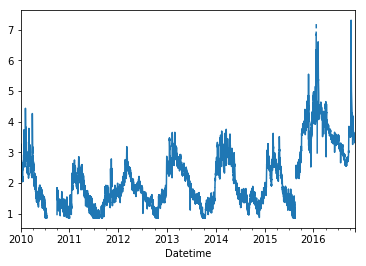

In [7]:
gw_df = get_table_for_variable('groundwater')
gw_df['Value'].plot()
print sum(gw_df['Value'].isnull())
print len(gw_df)
print 3845./60120

So approximately 6% of the gw data is NaN and from the figure a lot of that lookds like it happens at once like for a few months about 2/3 through 2010. I guess we just drop those ones.

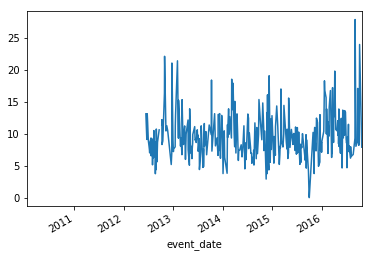

In [8]:
df.set_index(pd.to_datetime(df['event_date']))['wind_vel_hourly_max_avg'].plot()

For the hourly wind max, the earliest date is in 2012. Let's just try without that feature and delete it.

In [9]:
del df['wind_vel_hourly_max_avg']

In [10]:
del df['wind_dir_daily_avg']

In [11]:
df_filt = df[df['gw_daily_avg'].isnull()!= True]
df_filt.reset_index(inplace=True, drop=True)
feat_df = df_filt.iloc[:, :7]
feat_df_norm = (feat_df - feat_df.mean()) / (feat_df.max() - feat_df.min())
feat_df_norm

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_vel_daily_avg
0,0.064818,-0.014648,-0.034190,0.044518,0.032131,-0.049035,-0.128273
1,-0.050425,-0.025436,-0.031324,0.007103,-0.075680,0.055116,-0.118277
2,-0.032367,-0.001703,0.028848,0.061009,-0.075522,0.086563,-0.102315
3,0.049058,0.078124,0.209364,0.025544,-0.083883,0.096819,-0.157565
4,-0.028755,-0.018963,-0.034190,-0.059215,-0.036984,-0.006765,-0.071296
5,-0.052395,-0.031908,-0.039920,-0.084749,-0.046578,0.052494,0.019316
6,-0.002161,-0.008176,0.000194,-0.030489,-0.122436,0.135165,0.142031
7,-0.033680,-0.036223,-0.037055,-0.064534,-0.129616,-0.040397,-0.101753
8,0.026403,0.023108,0.014521,0.034411,-0.109581,-0.015886,-0.137841
9,-0.040575,-0.036223,-0.048516,0.061009,-0.099352,0.001464,-0.128669


In [12]:
df_filt

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_vel_daily_avg,num_flooded,flooded,event_name,event_date
0,1.320000,0.32,0.12,1.345000,2.441582,0.064875,4.722118,0.0,0,None,2013-04-29 00:00:00
1,0.150000,0.22,0.13,0.993333,1.780793,0.531583,5.013368,0.0,0,None,2014-06-21 00:00:00
2,0.333333,0.44,0.34,1.500000,1.781763,0.672500,5.478465,0.0,0,None,2014-06-13 00:00:00
3,1.160000,1.18,0.97,1.166667,1.730518,0.718458,3.868646,0.0,0,None,2014-06-12 00:00:00
4,0.370000,0.28,0.12,0.370000,2.017969,0.254292,6.382278,0.0,0,None,2014-05-28 00:00:00
5,0.130000,0.16,0.10,0.130000,1.959165,0.519833,9.022451,0.0,0,None,2014-06-05 00:00:00
6,0.640000,0.38,0.24,0.640000,1.494224,0.890292,12.598028,0.0,0,None,2014-07-04 00:00:00
7,0.320000,0.12,0.11,0.320000,1.450218,0.103583,5.494833,0.0,0,None,2014-08-01 00:00:00
8,0.930000,0.67,0.29,1.250000,1.573014,0.213417,4.443340,0.0,0,None,2014-08-02 00:00:00
9,0.250000,0.12,0.07,1.500000,1.635707,0.291167,4.710569,0.0,0,None,2014-08-03 00:00:00


In [13]:
pca = PCA()

In [14]:
p = pca.fit(feat_df_norm)
p.explained_variance_ratio_

array([ 0.32173283,  0.29104509,  0.20360802,  0.10561506,  0.05775536,
        0.01666304,  0.0035806 ])

In [30]:
.321+.291

0.612

In [15]:
p_vis = pca.fit_transform(feat_df)
df_pca = pd.DataFrame(p_vis)
df_filt[df_filt.flooded == 1].index.min()

476

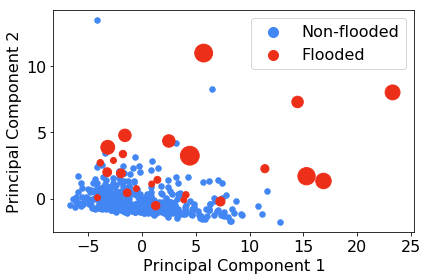

In [16]:
# %matplotlib notebook 
fig = plt.figure()

#uncomment if you want 3d plot
# ax = fig.add_subplot(111, projection='3d')
# nfl = ax.scatter(df_pca.loc[:476,0], df_pca.loc[:476, 1], df_pca.loc[:476, 2], c='#4286f4', label='Non-flooded', s=30)
# fl = ax.scatter(df_pca.loc[476:,0], df_pca.loc[476:, 1], df_pca.loc[476:, 2], c='#ed2f1a', s=30+df_filt.loc[476:, 'num_flooded']*6, label='Flooded')
# ax.set_zlabel('Principal Component 3',  fontsize=16)

ax = fig.add_subplot(111)
nfl = ax.scatter(df_pca.loc[:476,0], df_pca.loc[:476, 1], c='#4286f4', label='Non-flooded', s=30)
fl = ax.scatter(df_pca.loc[476:,0], df_pca.loc[476:, 1], c='#ed2f1a', s=30+df_filt.loc[476:, 'num_flooded']*6, label='Flooded')

ax.set_ylabel('Principal Component 2', fontsize=16)
ax.set_xlabel('Principal Component 1',  fontsize=16)
# ax.set_xticks(())
# ax.set_yticks(())
ax.tick_params(labelsize=16)
legend = ax.legend(fontsize=16, handler_map={fl: HandlerPathCollection(sizes=[100]), nfl: HandlerPathCollection(sizes=[100])})
fig.tight_layout()
fig.savefig('{}pc_wind.png'.format(fig_dir), dpi=300)
# %matplotlib inline

I'm interested in the non-flooding points that are far away from the rest of the group.

In [17]:
high_pc1 = df_pca[df_pca[0]>8].index
high_pc1

Int64Index([20, 21, 34, 57, 126, 293, 323, 333, 340, 360, 461, 463, 483, 484,
            485, 496, 498],
           dtype='int64')

In [18]:
def plot_features(record_indicies, df):
    ax = df.iloc[record_indicies, range(8)].plot.bar(fontsize=14, rot=15, legend=False, figsize=(7, 5.5))
    patches, labels = ax.get_legend_handles_labels()
    label_units = ([' (in)', ' (in)', ' (in)', ' (in)', ' (ft)', ' (ft)', '(deg)', '(mph)'])
    labels = map(add, labels, label_units)
    ax.legend(patches, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    print df.loc[record_indicies]
    ax.set_xticklabels(
        df.loc[record_indicies, 'event_name']+"\n"+ "(" +  df.loc[record_indicies, 'num_flooded'].astype(str)+")"
    )
    ax.set_xlabel('Event name \n (# locations flooded)', fontsize=14)
    fig  = plt.gcf()
    fig.tight_layout()

In [19]:
rain_df = get_table_for_variable('rainfall')

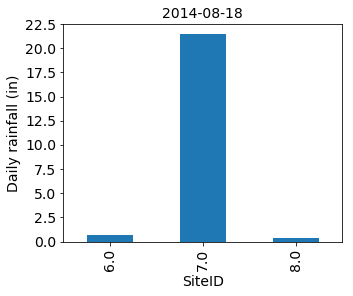

In [20]:
ax2 = rain_df['2014-08-18'].groupby('SiteID').sum()['Value'].plot.bar(figsize=(5,4), fontsize=14, title='2014-08-18')
ax2.set_ylabel('Daily rainfall (in)')
ax2.yaxis.label.set_size(14)
ax2.xaxis.label.set_size(14)
ax2.title.set_size(14)

     rain_daily_sum  rain_hourly_max  rain_15_min_max  rain_prev_3_days  \
48         7.510000             9.30             3.50          8.826667   
500       10.255000             1.59             0.67          8.240000   
163        4.335000             1.47             0.60          9.502500   
485        7.820000             1.22             0.33          8.075000   
498        7.612500             1.43             0.51          6.396500   
481        3.853333             2.23             0.76          3.883333   

     gw_daily_avg  tide_daily_avg  wind_vel_daily_avg  num_flooded  flooded  \
48       1.487029        0.284375            3.571062          0.0        0   
500      1.447289        1.111472           13.200000         48.0        1   
163      3.432301        0.956542           14.254889          0.0        0   
485      1.033844        1.493500           31.000000         32.0        1   
498      4.794867        1.701608           22.095951         17.0        1   


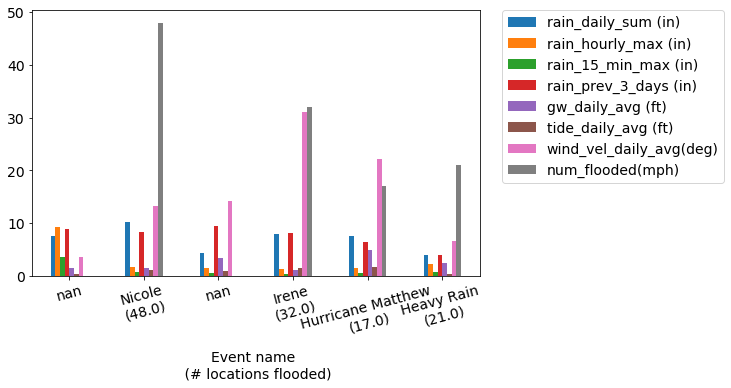

In [21]:
high_pc2 = df_pca.sort_values(1, ascending=False).index[:6]
plot_features(high_pc2, df_filt)
# df_filt.loc[high_pc2, :]

In [22]:
feat_df.head()

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_vel_daily_avg
0,1.320000,0.32,0.12,1.345000,2.441582,0.064875,4.722118
1,0.150000,0.22,0.13,0.993333,1.780793,0.531583,5.013368
2,0.333333,0.44,0.34,1.500000,1.781763,0.672500,5.478465
3,1.160000,1.18,0.97,1.166667,1.730518,0.718458,3.868646
4,0.370000,0.28,0.12,0.370000,2.017969,0.254292,6.382278


In [23]:
df_pca[8] = df_filt['flooded']

In [24]:
df_pca.head()

,0,1,2,3,4,5,6,8
0,-3.650310,0.868829,0.402703,-0.235043,-0.371763,0.511301,-0.016937,0
1,-3.450532,-0.044589,-0.307173,-0.668219,0.080860,-0.175094,-0.028744,0
2,-2.945922,0.506854,-0.301886,-0.704097,0.171045,-0.378246,0.069011,0
3,-4.531490,1.209790,-0.356520,0.065220,0.797327,0.143797,0.328832,0
4,-2.120103,-0.482808,-0.174204,-0.087516,0.071170,0.185796,-0.048513,0


In [25]:
clf = tree.DecisionTreeClassifier()

In [26]:
clf = clf.fit(df_filt.iloc[:, :7], df_filt['flooded'])

In [27]:
with open('flood.dot', 'w') as f:
     f = tree.export_graphviz(clf, out_file=f)

In [28]:
df_filt.iloc[:, :7].head()

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_daily_avg,tide_daily_avg,wind_vel_daily_avg
0,1.320000,0.32,0.12,1.345000,2.441582,0.064875,4.722118
1,0.150000,0.22,0.13,0.993333,1.780793,0.531583,5.013368
2,0.333333,0.44,0.34,1.500000,1.781763,0.672500,5.478465
3,1.160000,1.18,0.97,1.166667,1.730518,0.718458,3.868646
4,0.370000,0.28,0.12,0.370000,2.017969,0.254292,6.382278


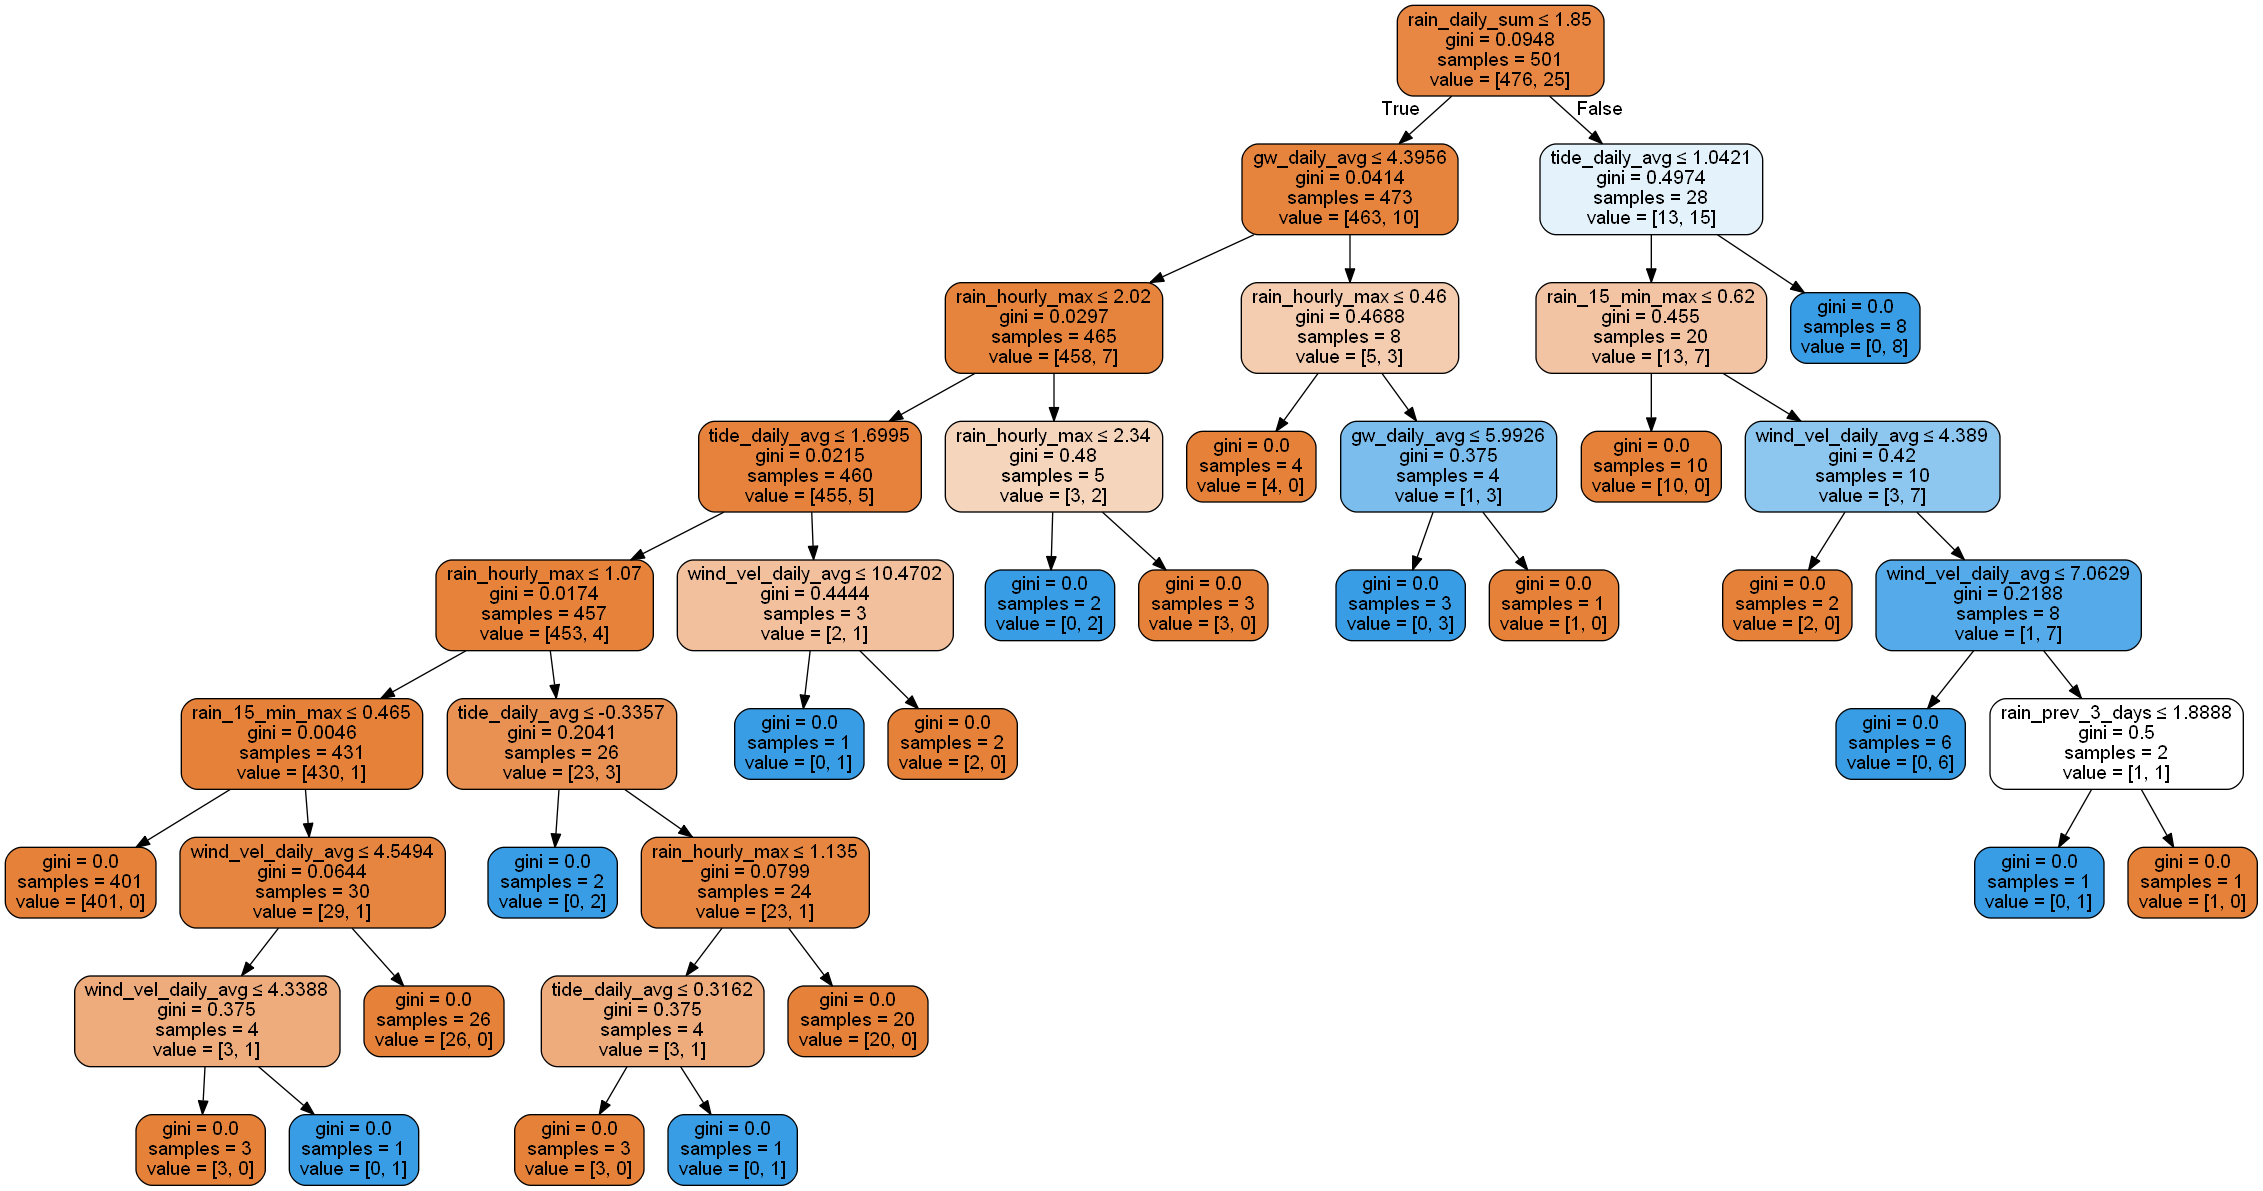

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df_filt.iloc[:, :7].columns,  
                         filled=True, rounded=True,  
                         special_characters=True,
                               )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 